# Import library and Read the Data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.graph_objects as go

In [16]:
df = pd.read_csv("Data/datauber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194.0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199.0,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355.0,2009-08-24 21:45:00.00000061,12.9,NaN,-74.005043,40.740770,NaN,40.772647,1.0
3,25894730.0,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,NaN,-73.965316,40.803349,3.0
4,17610152.0,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,NaN,40.744085,-73.973082,NaN,5.0


In [17]:
df.shape

(44377, 9)

In [18]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,2009-08-24 21:45:00.00000061,12.9,NaN,-74.005043,40.740770,NaN,40.772647,1.0
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,NaN,-73.965316,40.803349,3.0
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,NaN,40.744085,-73.973082,NaN,5.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44377 entries, 0 to 44376
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                42143 non-null  object 
 1   fare_amount        42217 non-null  float64
 2   pickup_datetime    42094 non-null  object 
 3   pickup_longitude   42183 non-null  float64
 4   pickup_latitude    42130 non-null  float64
 5   dropoff_longitude  42183 non-null  float64
 6   dropoff_latitude   42119 non-null  float64
 7   passenger_count    42159 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.7+ MB


# Missing values in our dataset

In [20]:
df.isna().sum()

key                  2234
fare_amount          2160
pickup_datetime      2283
pickup_longitude     2194
pickup_latitude      2247
dropoff_longitude    2194
dropoff_latitude     2258
passenger_count      2218
dtype: int64

# Rows with fare amount equal to zero

In [7]:
df[df['fare_amount'] == 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
22182,2010-03-20 02:59:51.0000002,0.0,2010-03-20 02:59:51 UTC,-73.994366,40.755395,-73.998718,40.854853,2.0


In [8]:
df = df[df['fare_amount'] > 0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29387 entries, 0 to 44376
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                29387 non-null  object 
 1   fare_amount        29387 non-null  float64
 2   pickup_datetime    29387 non-null  object 
 3   pickup_longitude   29387 non-null  float64
 4   pickup_latitude    29387 non-null  float64
 5   dropoff_longitude  29387 non-null  float64
 6   dropoff_latitude   29387 non-null  float64
 7   passenger_count    29387 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.0+ MB


In [13]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
5,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1.0
7,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0
8,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1.0


In [ ]:
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

# Data Analysis
### fare_amount Distribution

Text(0, 0.5, 'Count')

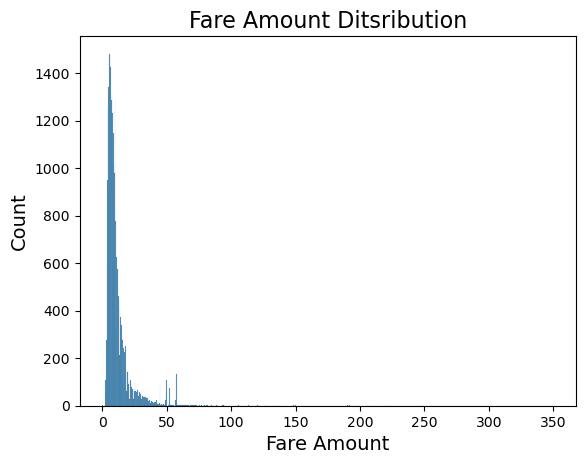

In [10]:
ax = sns.histplot(x = 'fare_amount', data = df)
ax.set_title('Fare Amount Ditsribution', fontsize=16)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Count', fontsize=14)